In [1]:
from potential_function import PotentialFunction
from gridworld import GridWorld


class GridWorldPotentialFunction(PotentialFunction):
    def __init__(self, mdp):
        self.mdp = mdp

    def get_potential(self, state):
        if state != GridWorld.TERMINAL:
            goal = (self.mdp.width, self.mdp.height)
            x = 0
            y = 1
            return 0.1 * (
                1 - ((goal[x] - state[x] + goal[y] - state[y]) / (goal[x] + goal[y]))
            )
        else:
            return 0.0

In [2]:
from model_free_reinforcement_learner import ModelFreeReinforcementLearner
from qlearning import QLearning


class RewardShapedQLearning(QLearning):
    def __init__(self, mdp, bandit, potential, qfunction, alpha=0.1):
        super().__init__(mdp, bandit, qfunction=qfunction, alpha=alpha)
        self.potential = potential

    def get_delta(self, reward, q_value, state, next_state, next_action):
        next_state_value = self.state_value(next_state, next_action)
        state_potential = self.potential.get_potential(state)
        next_state_potential = self.potential.get_potential(next_state)
        potential = self.mdp.discount_factor * next_state_potential - state_potential
        delta = reward + potential + self.mdp.discount_factor * next_state_value - q_value
        return delta

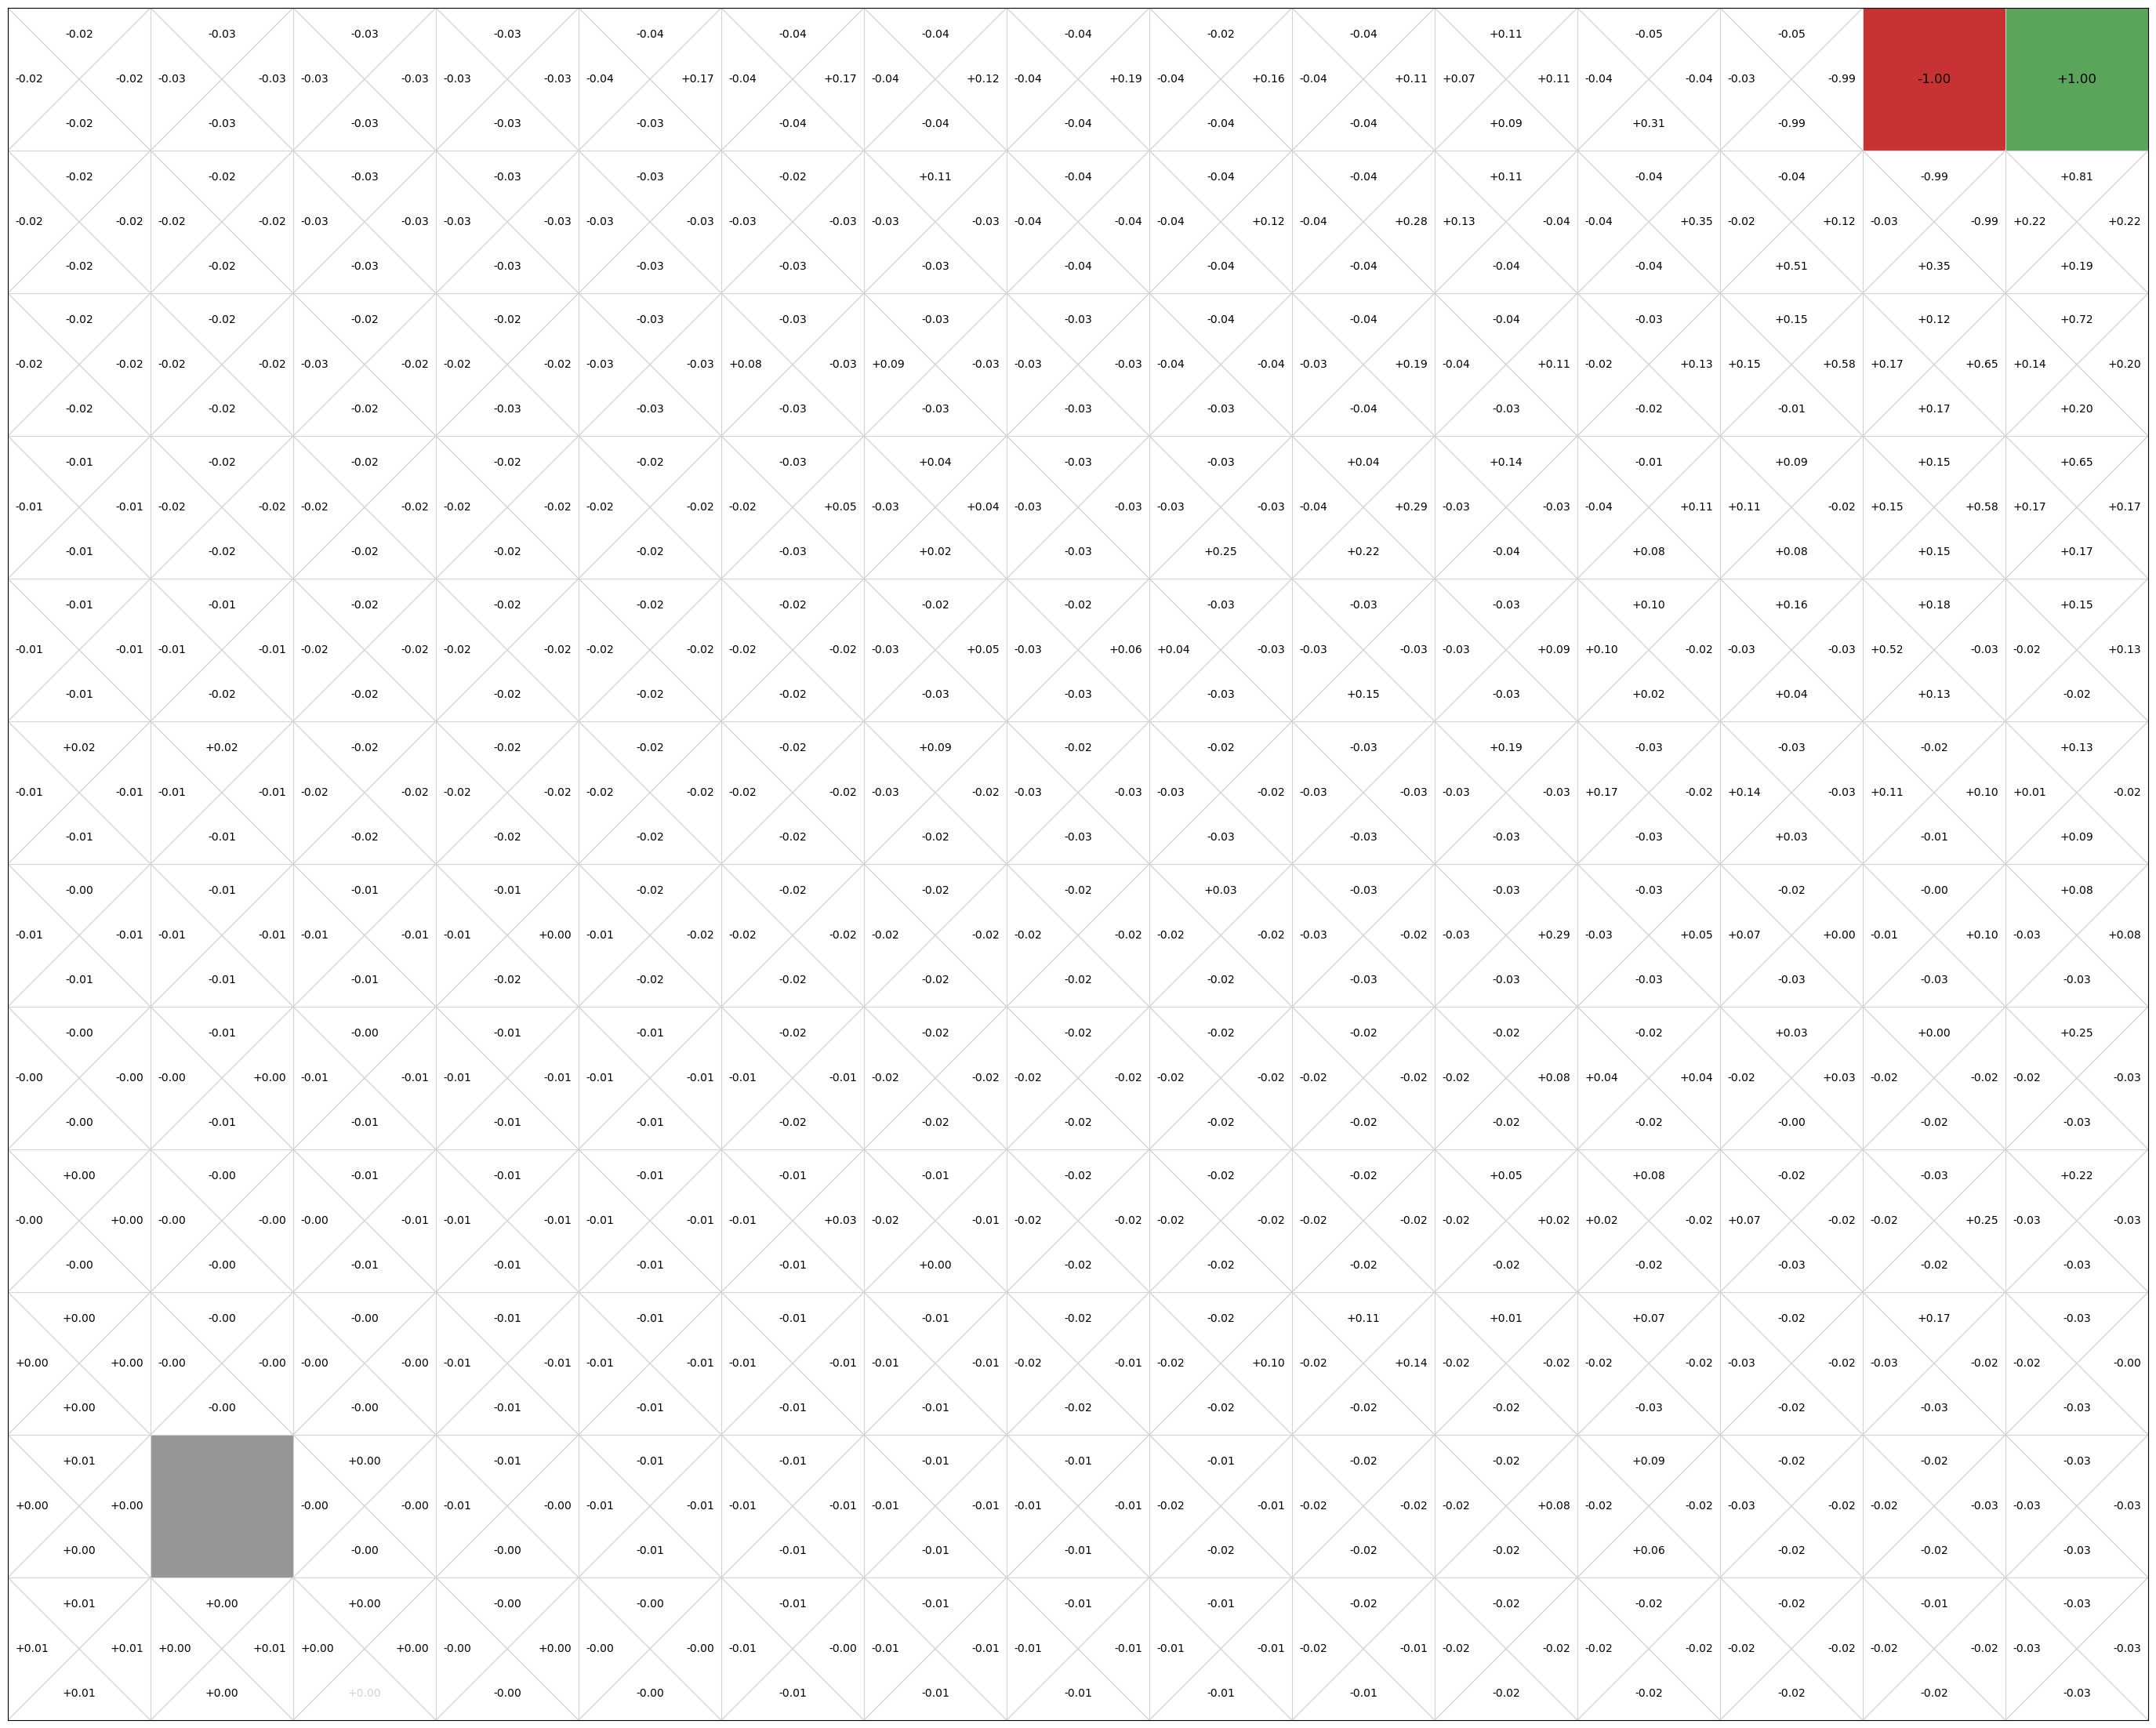

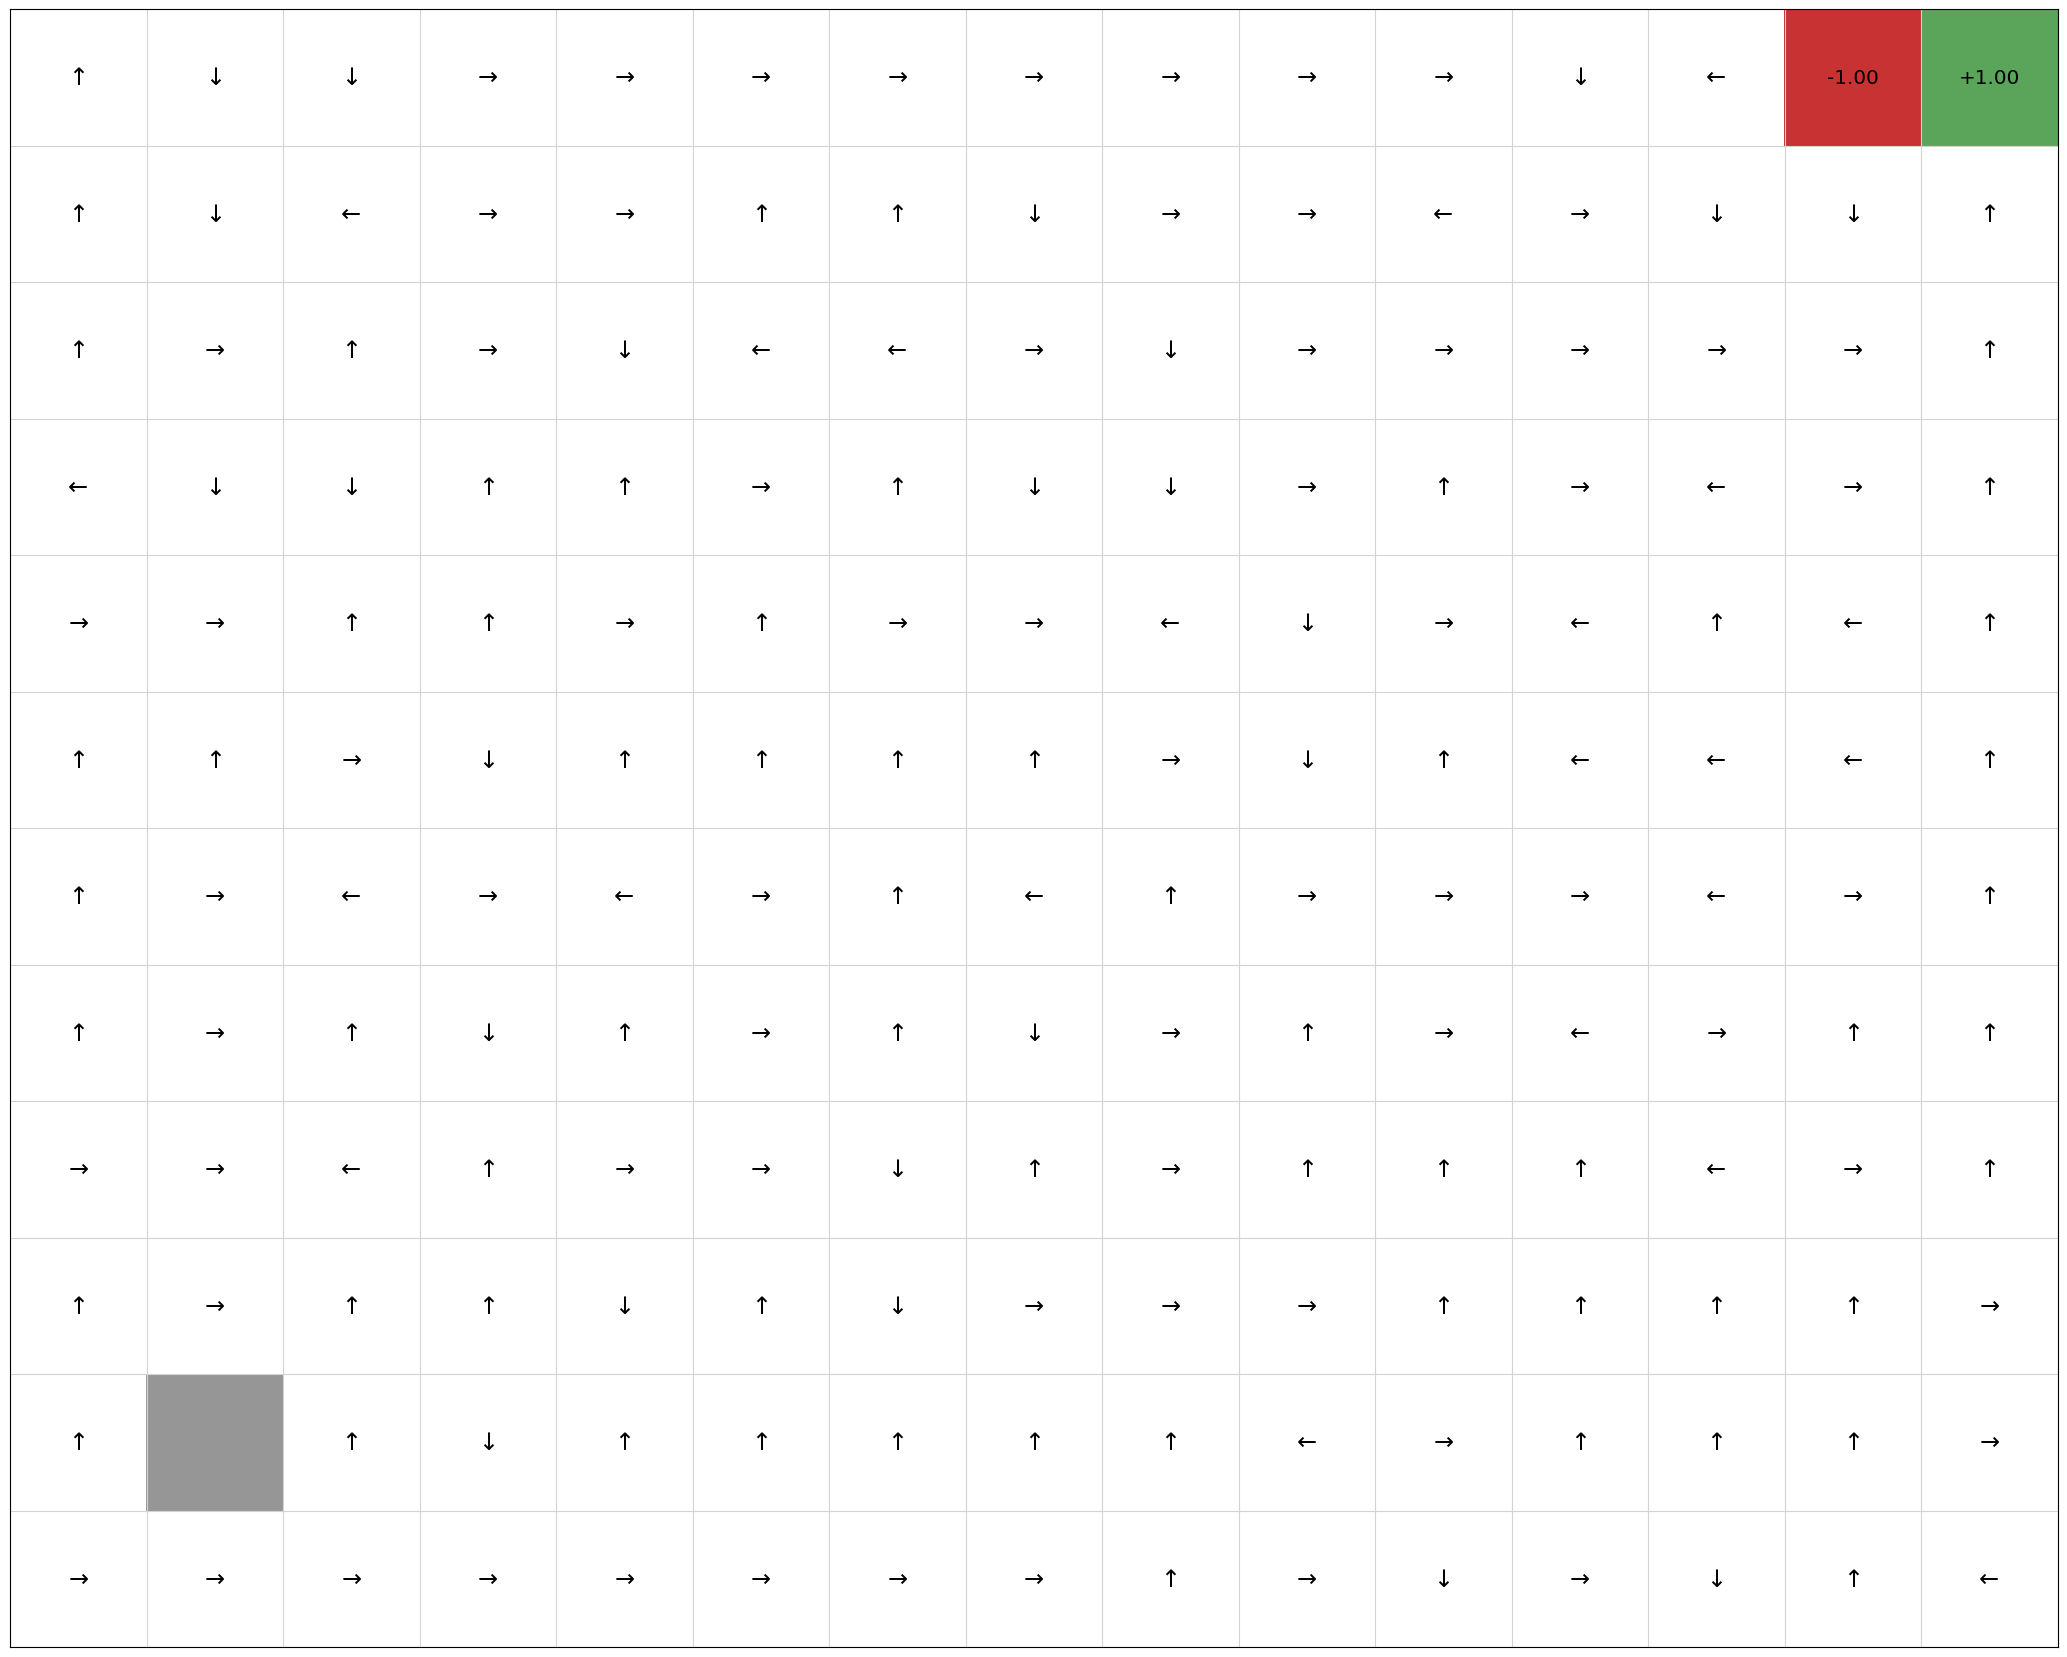

In [4]:
from qtable import QTable
from qlearning import QLearning
from reward_shaped_qlearning import RewardShapedQLearning
from gridworld_potential_function import GridWorldPotentialFunction
from multi_armed_bandit.epsilon_greedy import EpsilonGreedy


mdp = GridWorld(width = 10, height = 7, goals = [((14,11), 1), ((13,11), -1)])
qfunction = QTable()
potential = GridWorldPotentialFunction(mdp)
RewardShapedQLearning(mdp, EpsilonGreedy(), potential, qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)
reward_shaped_rewards = mdp.get_rewards()

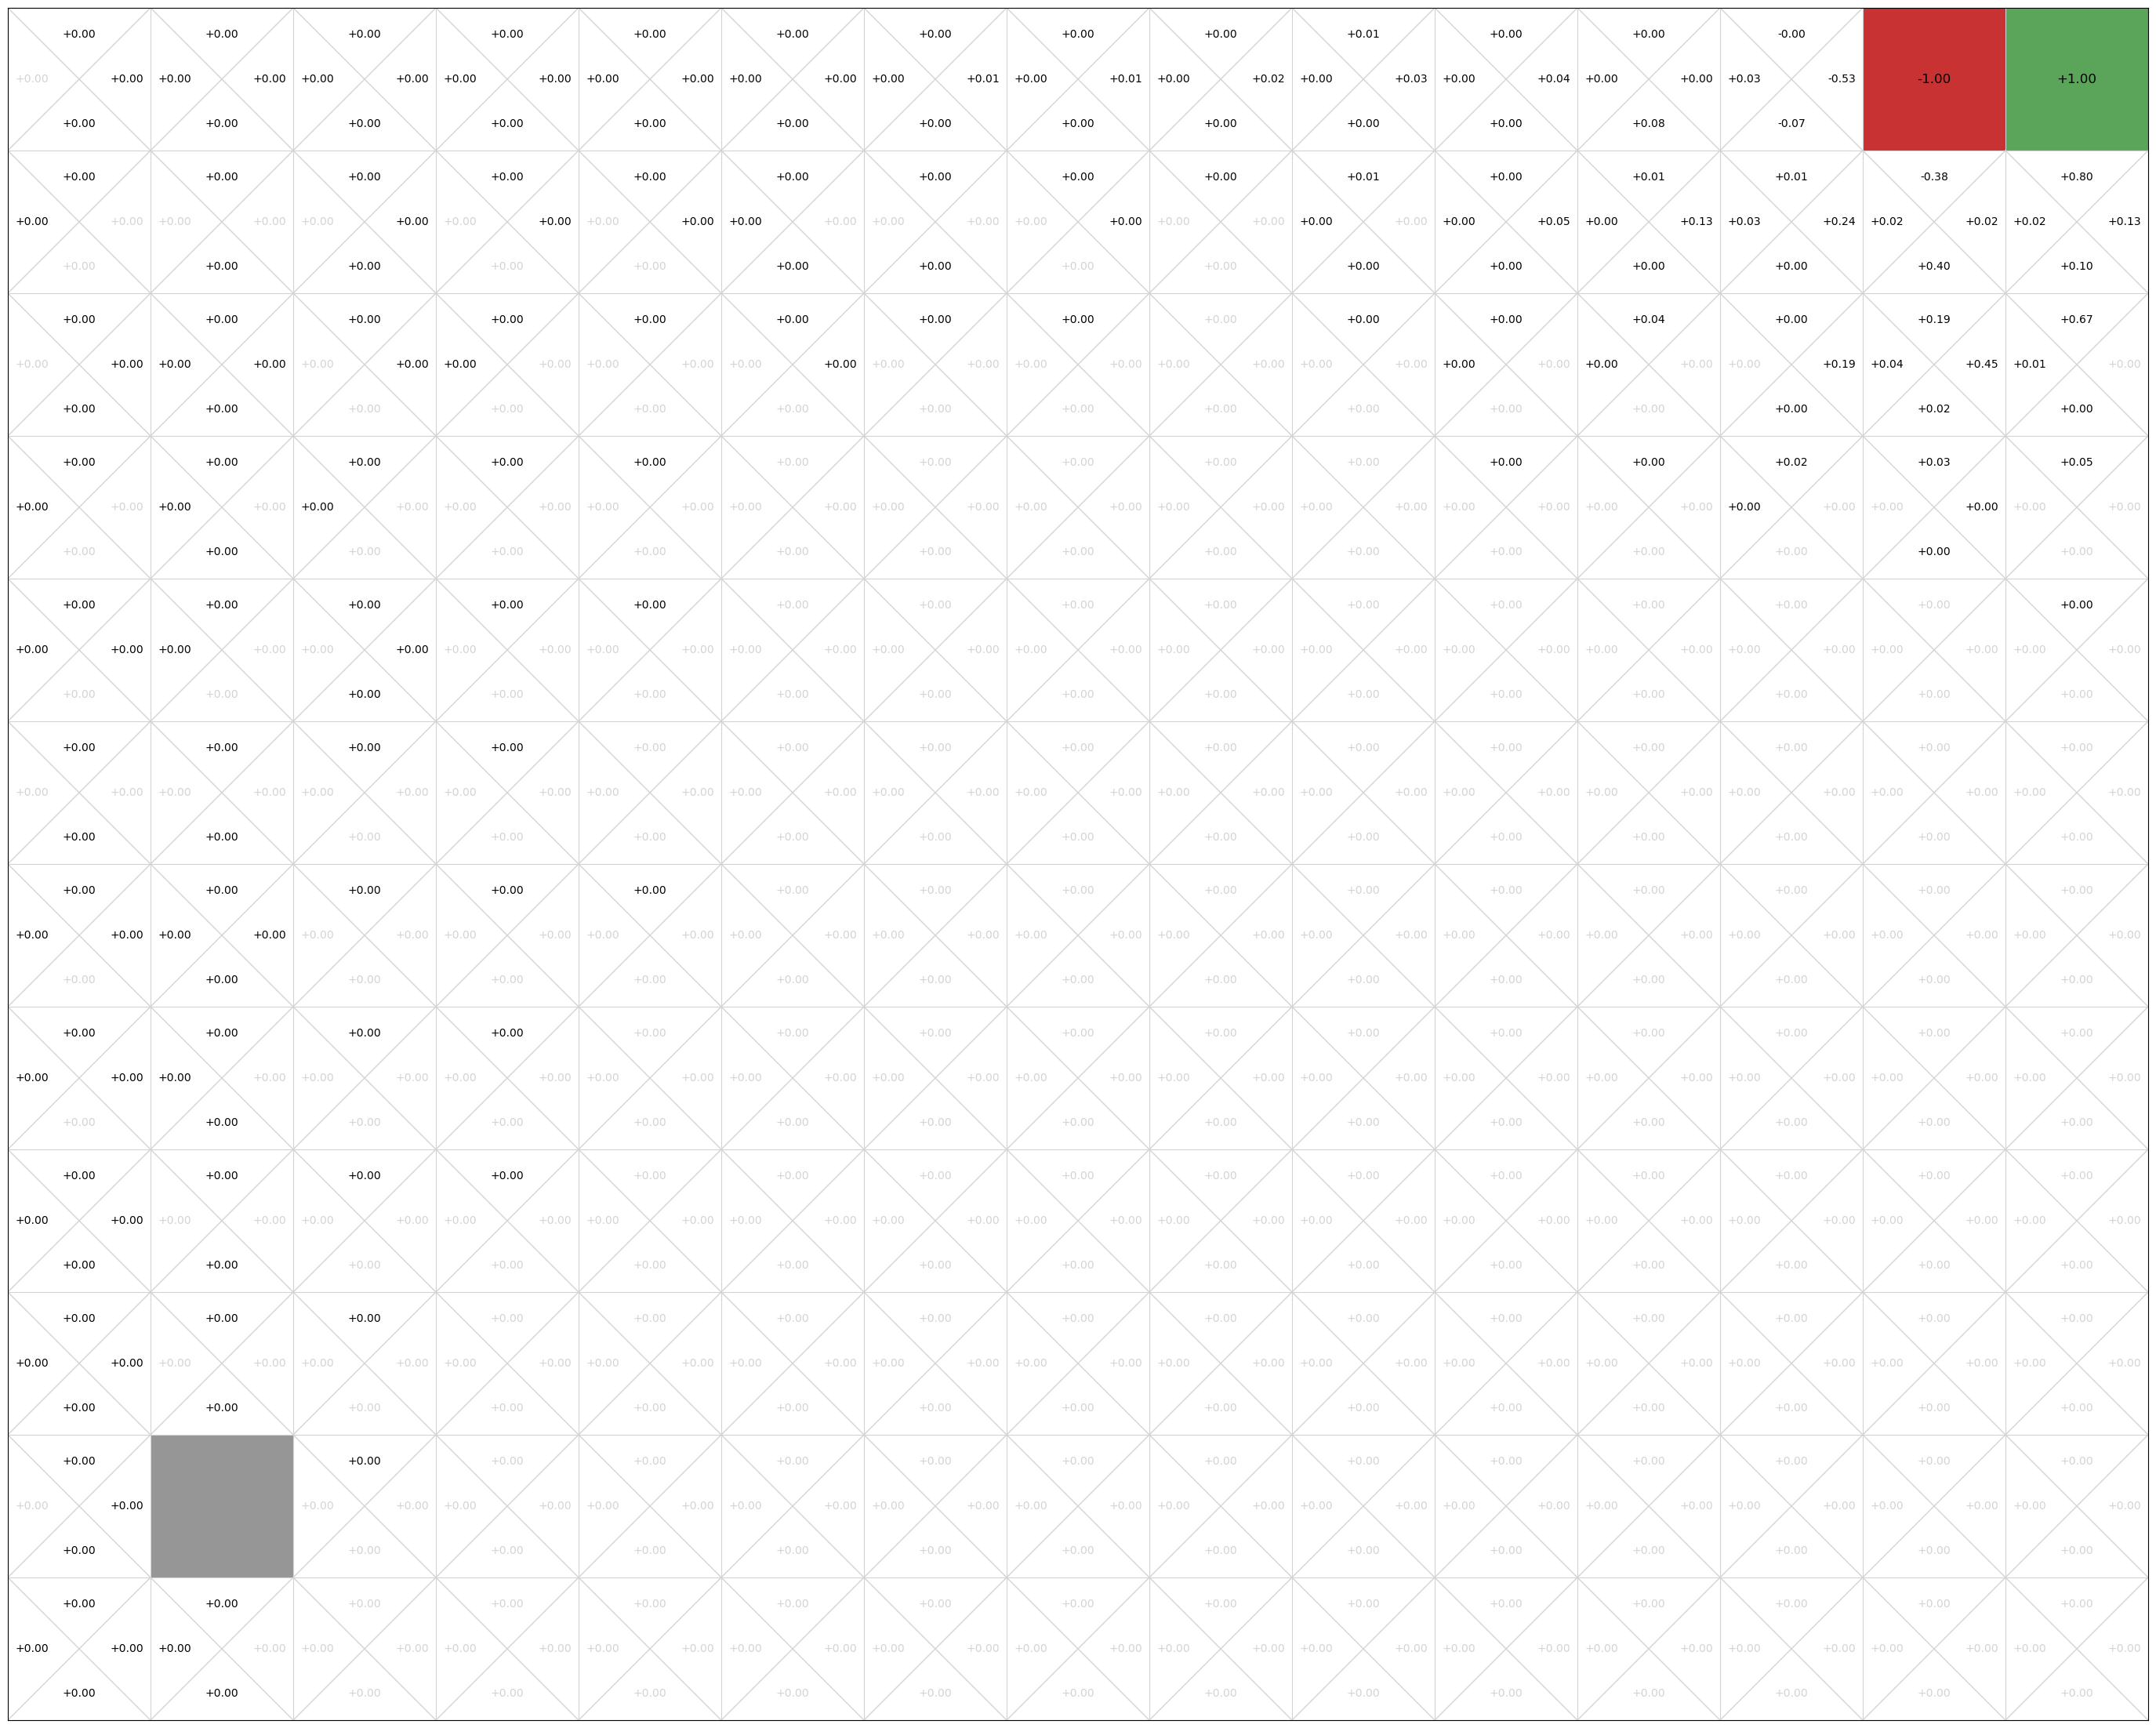

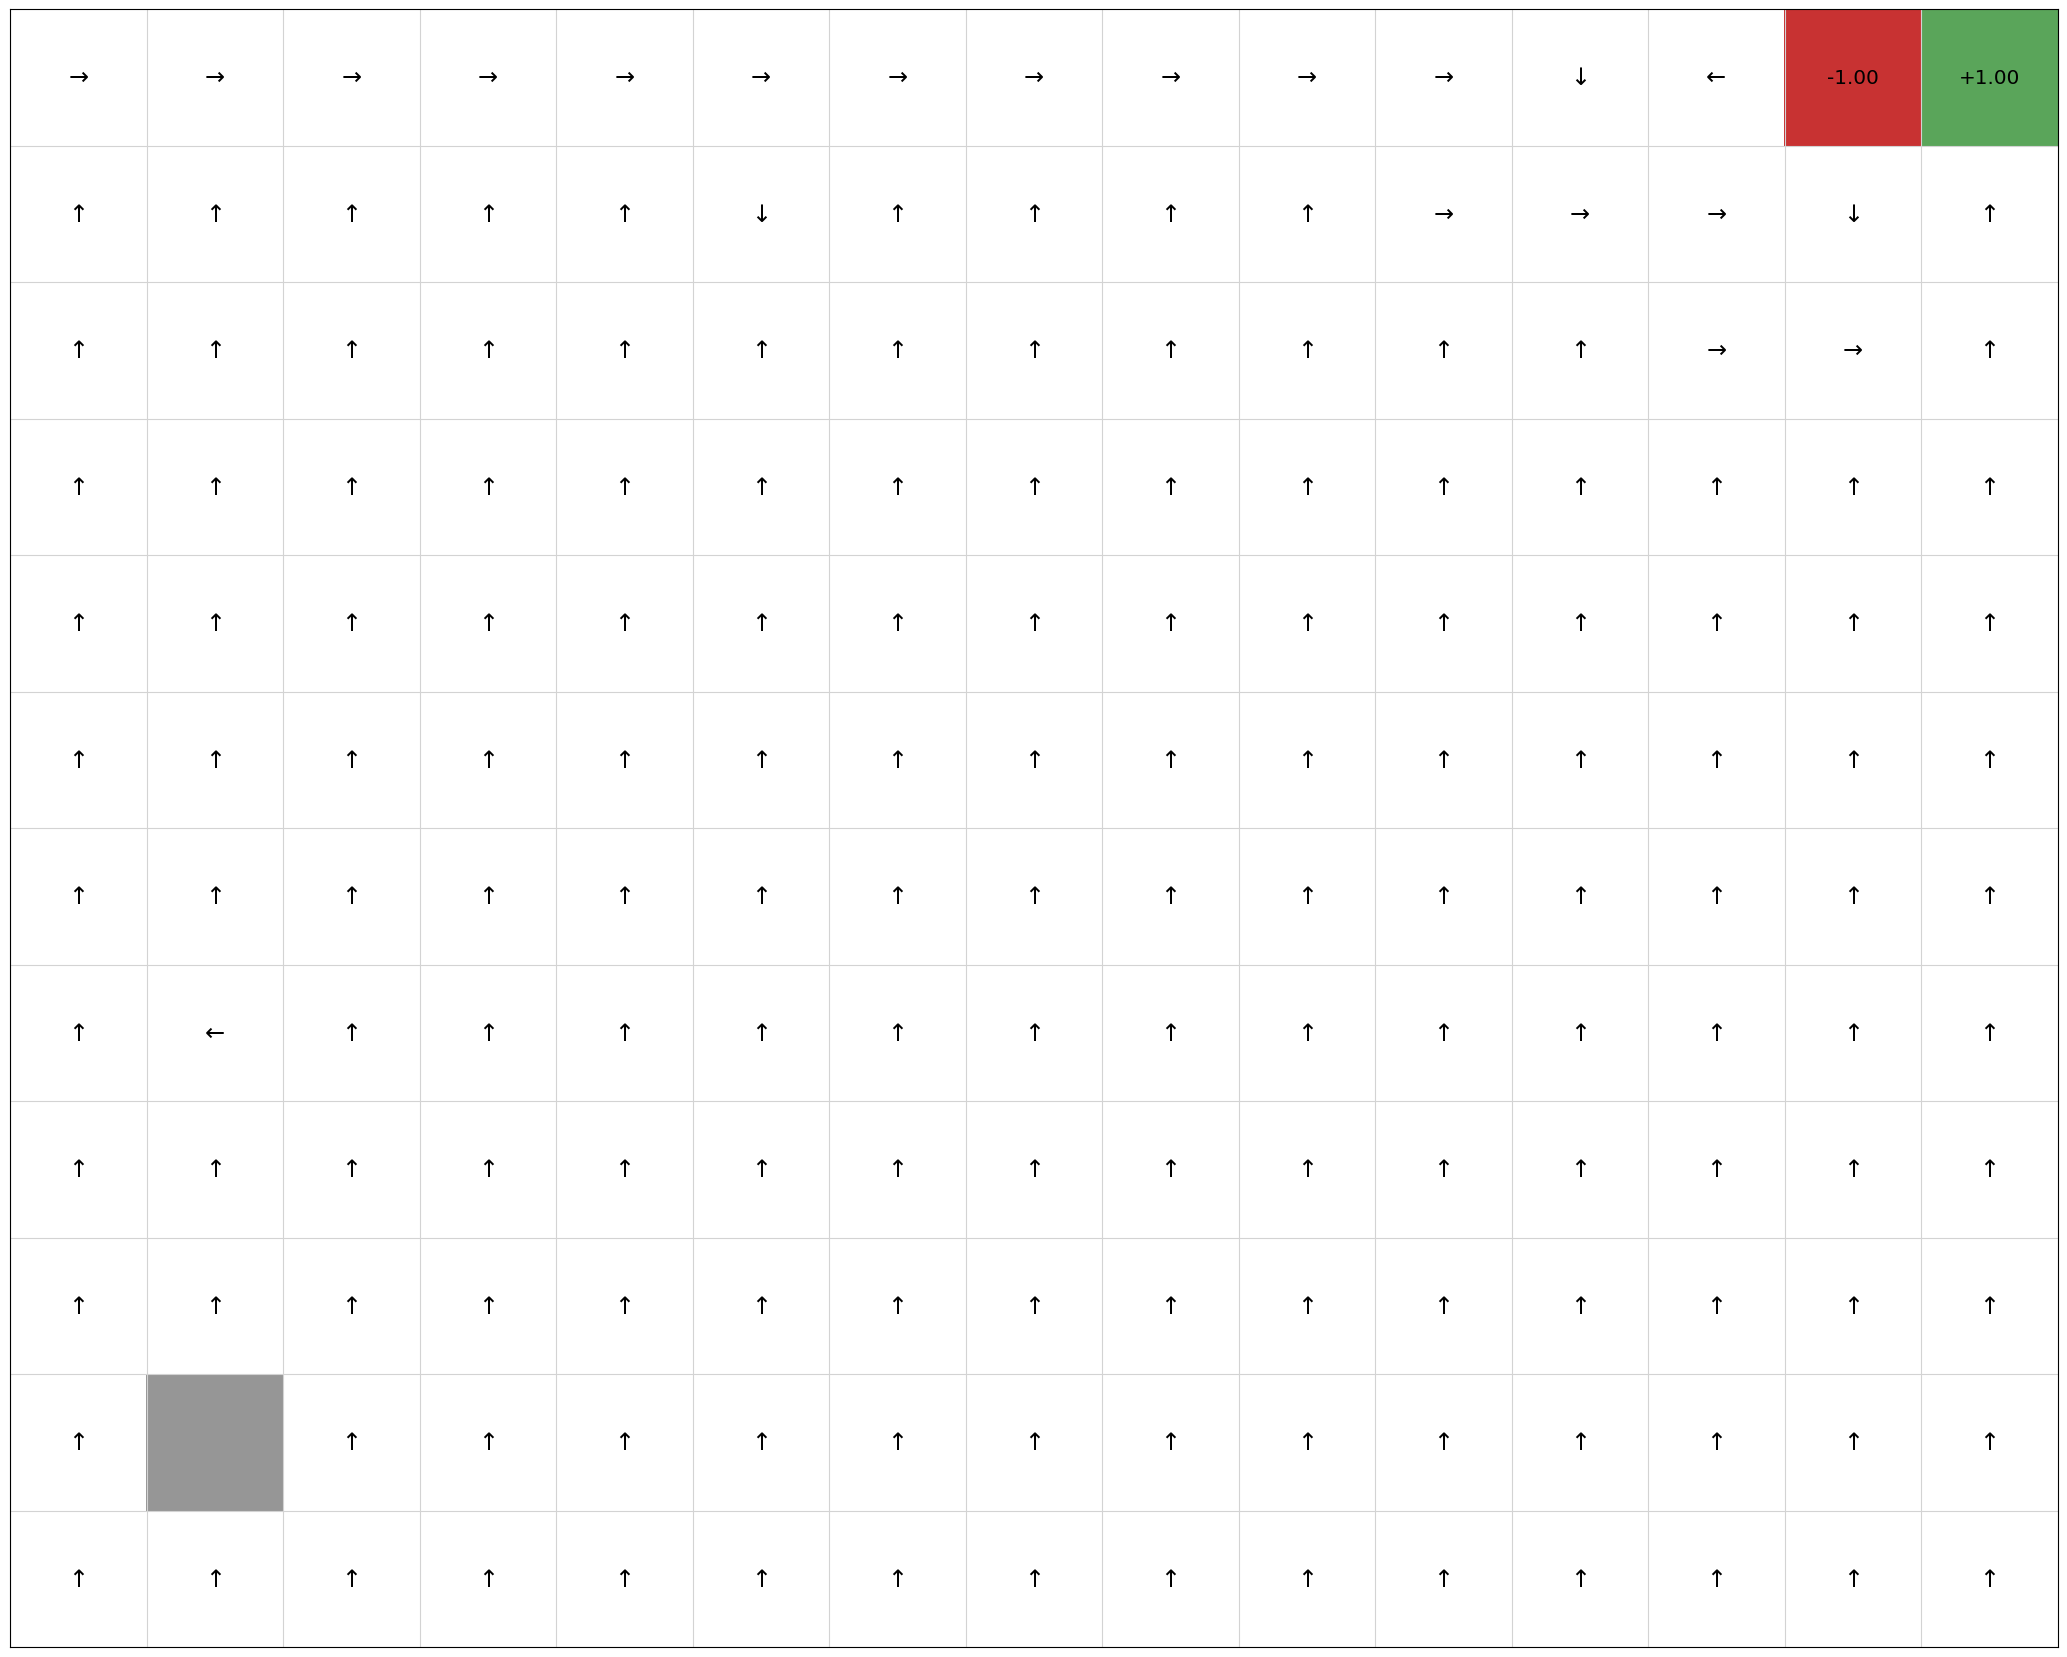

In [5]:
mdp = GridWorld(width = 15, height = 12, goals = [((14,11), 1), ((13,11), -1)])
qfunction = QTable()
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)
q_learning_rewards = mdp.get_rewards()

In [6]:
from tests.plot import Plot

Plot.plot_episode_length(
    ["Tabular Q-learning", "Reward shaping"],
    [q_learning_rewards, reward_shaped_rewards],
)

ModuleNotFoundError: No module named 'tests.plot'